x ['-6.5224338e-01', '3.8584055e+00', '-1.6328513e+00', '-4.7685935e+00', '-5.3827894e+00', '9.4597537e-01', '-1.2425256e+00', '-5.0284751e-01', '1.1355621e+00', '-4.5612633e+00', '-4.3859765e+00', '-2.0623607e+00', '1.0567392e+00', '4.5833333e+00', '4.3859765e+00', '-2.4551913e+00', '3.7495063e-01', '4.1871400e+00', '-4.3305709e+00', '-1.2555724e+00', '-9.5014691e-01', '-1.4557681e+00', '-5.9604450e-01', '4.6193977e+00', '8.6025759e-01', '-3.3819207e+00', '-4.1866140e+00', '8.2468216e-01', '1.2521396e+00', '-7.8488541e-01', '-1.2095195e+00', '-5.3092618e-01', '1.0729879e+00', '2.6621074e+00', '-7.3014469e-01', '-3.8584055e+00', '-7.0050772e-01', '1.9036808e-01', '-9.3991538e-01', '-8.5352016e-01', '3.5284558e-01', '-6.4362692e-02', '4.7916667e+00', '-8.8240523e-01', '9.1346618e-01', '4.9608071e+00', '1.2008836e+00', '-2.4306198e+00', '2.2587760e+00', '2.2960385e-01', '-7.6540425e-16', '8.4294027e-01', '3.2208769e+00', '5.9239147e-01', '-4.6995961e+00', '4.9759236e+00', '2.6433054e+00'

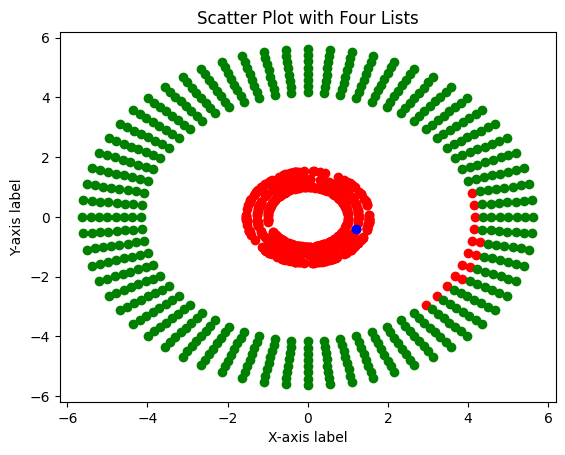

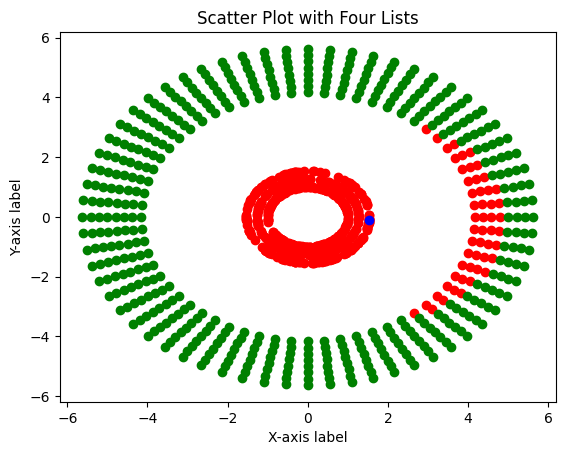

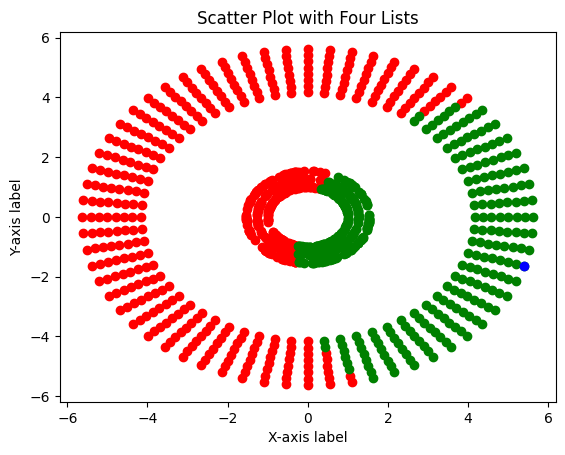

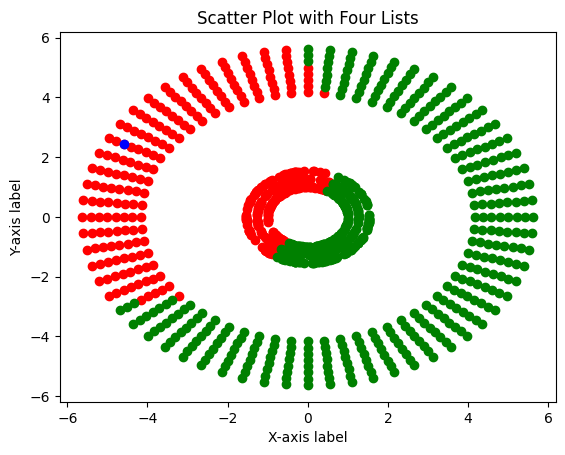

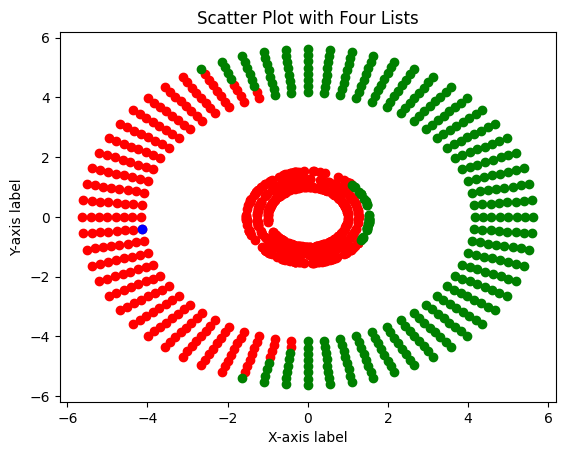

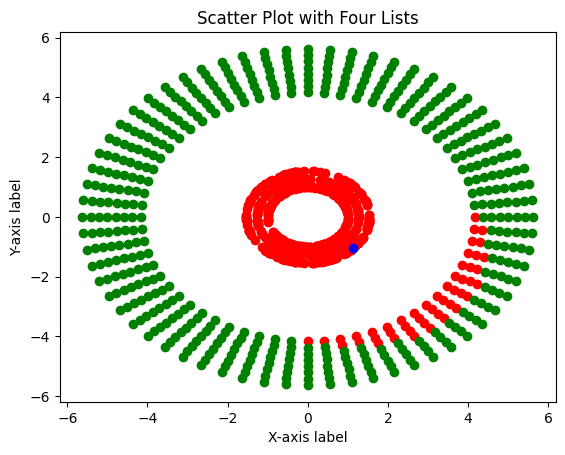

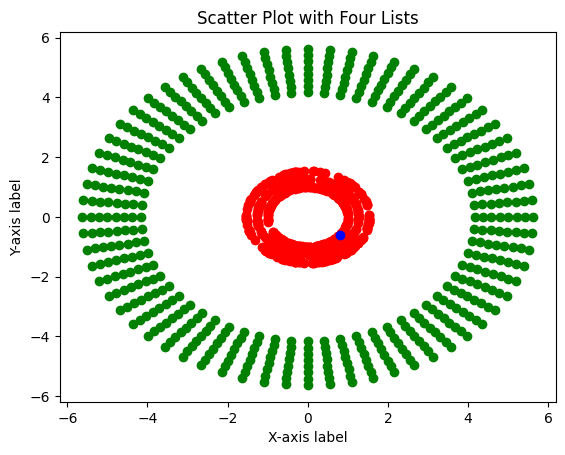

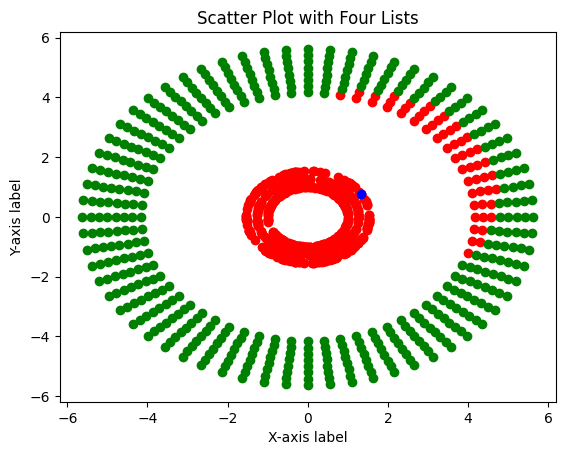

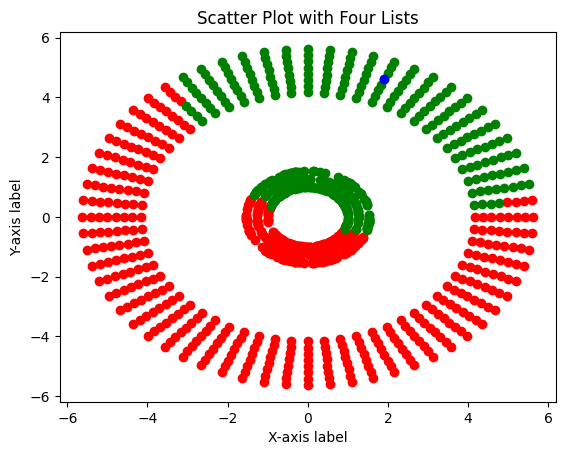

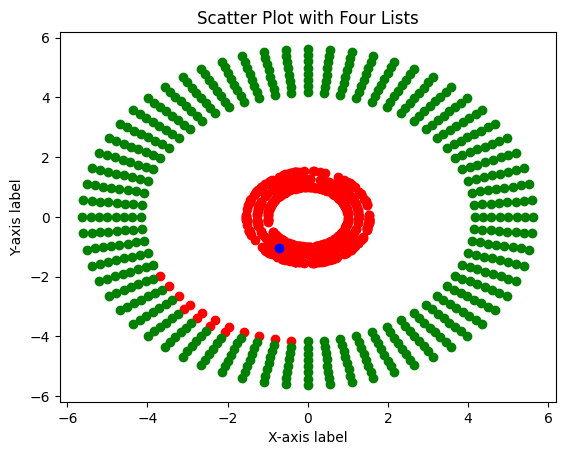

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# ridgetest = "ridgetest.txt"
# ridgetrain = "ridgetrain.txt"

file_path = "kmeans_data.txt"


try:
    with open(file_path, "r") as file:
        # Read the contents of the file
        file_contents = file.read()
        words = file_contents.split()
        # print(words)

        x = []
        y = []


        for j in range(0, len(words), 2):
            for i in range(2):
                if i ==0:
                    x.append(words[j+i])
                if i ==1:
                    y.append(words[j+i])
                # print(words[j+i])

            # print("\n")

            # for j in range(len(words)):
            #     # x.append(file_contents)
            #     print(i).
        x_sq_plus_y_sq = []
        print("x",x)
        print("y",y)

        list_of_list = []
        for i,j in zip(x,y):
            # print(i,j)
            temp = []
            i_int = float(i)
            j_int = float(j)
            temp.append(i_int)
            temp.append(j_int)
            list_of_list.append(temp)
            temp = i_int*i_int+j_int*j_int
            x_sq_plus_y_sq.append(temp)

        # print(x_sq_plus_y_sq)
        print(list_of_list)

except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")





def rbf_kernel_temp(x_n,x_m):
    gamma = 0.1
    # rbf_kernel_value = math.exp(-1*gamma*math.sqrt(abs(x_n-x_m)))

    transformed_list = []
    for i1,i2 in zip(x_n,x_m):
        temp = math.exp(-1*gamma*((abs(float(i1)-float(i2)))**2))
        transformed_list.append(temp)
    # print("transformed_list: ", transformed_list)

    x = np.array(x_n)
    y = np.array(x_m)
    l2_norm = np.linalg.norm(x - y)
    return math.exp(-1*gamma*(l2_norm))
    # print("final: ",math.exp(-1*gamma*(l2_norm)))

# def kernel(x,y):
#   x = np.array(x)
#   y = np.array(y)
#   l2_norm = np.linalg.norm(x - y)
#   return math.exp(-1*gamma(l2_norm))



for i in range(10):
    final_list= []
    random_number = random.randint(1, len(list_of_list))

    for index,i in enumerate(list_of_list):

        final_list.append(rbf_kernel_temp(list_of_list[index],list_of_list[random_number]))

    cluster1_mean = final_list[0]
    cluster2_mean = final_list[1]


    for i in range(10):
        mean_1 = cluster1_mean
        mean_2 = cluster2_mean
        cluster1 = []
        cluster2 = []
        cluster1_index = []
        cluster2_index = []
        for index,i in enumerate(final_list):
            distance_1 = abs(i-mean_1)
            distance_2 = abs(i-mean_2)
            if distance_1 < distance_2:
                cluster1.append(i)
                cluster1_index.append(index)
            else:
                cluster2.append(i)
                cluster2_index.append(index)

        # cluster means updated


        cluster1_mean = np.mean(cluster1)
        cluster2_mean = np.mean(cluster2)

        cluster1_index_x1 = []
        cluster1_index_x2 = []
        cluster2_index_x1 = []
        cluster2_index_x2 = []
        # for i in range(len(list_of_list)):
        for i in cluster1_index:
            cluster1_index_x1.append(list_of_list[i][0])
            cluster1_index_x2.append(list_of_list[i][1])

        for i in cluster2_index:
            cluster2_index_x1.append(list_of_list[i][0])
            cluster2_index_x2.append(list_of_list[i][1])



    color_values = ['red', 'green', 'blue', 'yellow', 'orange']

    # Scatter plot
    plt.scatter(cluster1_index_x1, cluster1_index_x2, marker='o', c='r')
    plt.scatter(cluster2_index_x1, cluster2_index_x2, marker='o', c='g')
    plt.scatter(list_of_list[random_number][0], list_of_list[random_number][1], marker='o', c='b')



    # Customize the plot
    plt.title('Scatter Plot with Four Lists')
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')

    # Show the plot
    plt.show()
